In [67]:
#importy
import cv2
import os
import pandas as pd
from tensorflow.keras.layers import Conv2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from random import sample
from tensorflow.keras.utils import to_categorical
import sklearn.model_selection
import matplotlib.pyplot as pplt
import keras
from enum import Enum
import numpy as np
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
import matplotlib.pyplot as plt

In [32]:
directory = 'Project-EmotionReader'
img = cv2.imread('Project-EmotionReader/happy/S087_005_00000010.png')  


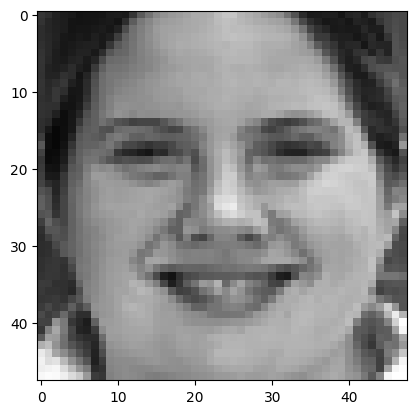

In [33]:
img.size
pplt.imshow(img,cmap ='gray')

In [34]:
data = pd.DataFrame()
for emotion in os.listdir(r'./Project-EmotionReader'): #nwm czmu wcesniej mialem get_files zmamiast os.listdir i dzialalo
    print(emotion)
    for file in os.listdir(os.path.join(r'./Project-EmotionReader' + '/' + emotion)): #tu tez
        print(os.path.join(emotion+'/'+file),emotion)

anger
anger/S010_004_00000017.png anger
anger/S010_004_00000018.png anger
anger/S010_004_00000019.png anger
anger/S011_004_00000019.png anger
anger/S011_004_00000020.png anger
anger/S011_004_00000021.png anger
anger/S014_003_00000028.png anger
anger/S014_003_00000029.png anger
anger/S014_003_00000030.png anger
anger/S022_005_00000030.png anger
anger/S022_005_00000031.png anger
anger/S022_005_00000032.png anger
anger/S026_003_00000013.png anger
anger/S026_003_00000014.png anger
anger/S026_003_00000015.png anger
anger/S028_001_00000022.png anger
anger/S028_001_00000023.png anger
anger/S028_001_00000024.png anger
anger/S029_001_00000017.png anger
anger/S029_001_00000018.png anger
anger/S029_001_00000019.png anger
anger/S032_003_00000015.png anger
anger/S032_003_00000016.png anger
anger/S032_003_00000017.png anger
anger/S034_003_00000025.png anger
anger/S034_003_00000026.png anger
anger/S034_003_00000027.png anger
anger/S037_003_00000020.png anger
anger/S037_003_00000021.png anger
anger/S0

In [35]:
#lista images i labeli
imgs = []
labels = []
for emotion in os.listdir(r'./Project-EmotionReader'): #tak jak wyzej
    for file in os.listdir(os.path.join(r'./Project-EmotionReader' + '/' + emotion)): #to samo
        #print(os.path.join(emotion+'/'+file),emotion)
        labels.append(emotion)
        img = cv2.imread(os.path.join(r'./Project-EmotionReader' + '/' + emotion + '/' + file),cv2.IMREAD_GRAYSCALE)
        imgs.append(img)
print( "Czy obie listy sa tej samej dlugosci:" )
print(len(imgs) == len(labels))

Czy obie listy sa tej samej dlugosci:
True


In [36]:
#print(labels[400])
#pplt.imshow(imgs[400])
#
print(len(imgs))
print(len(labels))

981
981


In [37]:
X = np.array(imgs)
y = np.array(labels)

In [55]:
#print(imgs)

In [39]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, shuffle = True)

In [40]:
X_test.shape

(197, 48, 48)

In [41]:
train_X = X_train.reshape(-1, 48,48, 1)
test_X = X_test.reshape(-1, 48,48, 1)

In [42]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

In [43]:
dict = {}
dict["anger"] = 0
dict["contempt"] = 1
dict["disgust"] = 2
dict["fear"] = 3
dict["happy"] = 4
dict["sadness"] = 5
dict["surprise"] = 6

In [44]:
#y_test i y_train trzeba zmienić na wektory
for i in range(len(y_test)):
    y_test[i] = dict[y_test[i]]    
for i in range(len(y_train)):
    y_train[i] = dict[y_train[i]]


In [45]:
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

In [46]:
train_X,valid_X,train_label,valid_label = sklearn.model_selection.train_test_split(X_train, train_Y_one_hot, test_size=0.2, shuffle = True)

##### Inicjujemy model

In [47]:
model = Sequential()

##### Dodajemy warstwy
najpierw 32 filtry, input shape ponieważ taki mamy format obrazów

In [48]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(48,48,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(7, activation='softmax'))

C:\Users\NotAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\NotAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [54]:
#model.add(Conv2D(32, kernel_size=3,activation='linear',input_shape=(48,48,1),padding='same'))
#model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
#model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
#model.add(Flatten())
#model.add(Dense(128, activation='linear'))              
#model.add(Dense(7, activation='softmax'))

##### teraz wypłaszczamy na wektor

In [148]:
a = model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])


In [149]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_14 (LeakyReLU)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_15 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,527 (2.61 MB)

 Trainable params: 683,527 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [150]:
trained = model.fit(train_X, train_label, batch_size=64,epochs=20,verbose=1,validation_data=(valid_X, valid_label))



Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9332 - loss: 0.3122 - val_accuracy: 0.8917 - val_loss: 0.3365
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9548 - loss: 0.1055 - val_accuracy: 0.9936 - val_loss: 0.1006
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9959 - loss: 0.0282 - val_accuracy: 0.9936 - val_loss: 0.0655
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9949 - loss: 0.0145 - val_accuracy: 0.9873 - val_loss: 0.1201
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.9936 - val_loss: 0.0765
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9936 - val_loss: 0.0679
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9936 - val_loss: 0.0774
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9936 - v

In [137]:
test_eval = model.evaluate(X_test, test_Y_one_hot,verbose=0)
print('Accuracy:', accuracy)

Accuracy: [0.20985132455825806, 0.9796954393386841]


In [138]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2291799634695053
Test accuracy: 0.9847715497016907


In [139]:
prediction = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [140]:
prediction = np.argmax(np.round(prediction),axis=1)

In [141]:
prediction

array([4, 0, 0, 6, 0, 4, 6, 6, 3, 5, 6, 5, 6, 1, 5, 6, 1, 0, 6, 6, 1, 2,
       5, 1, 2, 5, 4, 1, 4, 4, 1, 6, 6, 6, 3, 4, 4, 3, 0, 6, 4, 6, 4, 4,
       6, 2, 6, 0, 6, 2, 1, 1, 6, 4, 5, 6, 6, 2, 6, 2, 2, 6, 3, 5, 4, 4,
       5, 4, 5, 2, 5, 0, 4, 4, 4, 6, 4, 2, 2, 4, 4, 2, 4, 3, 6, 2, 0, 4,
       2, 2, 6, 6, 1, 0, 2, 2, 4, 2, 6, 0, 0, 3, 6, 4, 6, 6, 4, 2, 6, 6,
       6, 4, 0, 2, 6, 0, 6, 5, 2, 3, 1, 0, 2, 6, 4, 6, 3, 2, 6, 6, 4, 2,
       6, 3, 0, 4, 6, 4, 4, 2, 2, 2, 3, 1, 6, 2, 4, 2, 6, 0, 4, 6, 6, 0,
       2, 2, 1, 1, 0, 1, 6, 0, 2, 4, 6, 5, 4, 6, 4, 4, 4, 6, 5, 2, 6, 6,
       4, 5, 2, 6, 2, 5, 2, 6, 0, 6, 3, 4, 1, 2, 4, 4, 6, 5, 0, 4, 0],
      dtype=int64)

In [142]:
prediction.shape

(197,)

In [143]:
# tablica gdzie zgadniete bylo takie jakie powinno byc
tablica = y_test.astype('float64') == prediction.astype('float64')
# ile było przewidzianych dobrze
ile_zgadnietych=np.cumsum(y_test.astype('float64') == prediction.astype('float64'))[len(prediction)-1]
print("Zgadnieto {} zdjec dobrze".format(ile_zgadnietych))

Zgadnieto 195 zdjec dobrze


In [144]:
tablica

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [145]:
ind = np.where(tablica == False)
ind

(array([20, 27], dtype=int64),)

In [109]:
for i in range(len(tablica)):
    print("Co powinno byc: {}    co jest:  {}  ".format(prediction[i],y_test[i]))


Co powinno byc: 4    co jest:  4  
Co powinno byc: 0    co jest:  0  
Co powinno byc: 0    co jest:  0  
Co powinno byc: 6    co jest:  6  
Co powinno byc: 0    co jest:  0  
Co powinno byc: 4    co jest:  4  
Co powinno byc: 6    co jest:  6  
Co powinno byc: 6    co jest:  6  
Co powinno byc: 3    co jest:  3  
Co powinno byc: 5    co jest:  5  
Co powinno byc: 6    co jest:  6  
Co powinno byc: 5    co jest:  5  
Co powinno byc: 6    co jest:  6  
Co powinno byc: 1    co jest:  1  
Co powinno byc: 5    co jest:  5  
Co powinno byc: 6    co jest:  6  
Co powinno byc: 1    co jest:  1  
Co powinno byc: 0    co jest:  0  
Co powinno byc: 6    co jest:  6  
Co powinno byc: 6    co jest:  6  
Co powinno byc: 1    co jest:  3  
Co powinno byc: 2    co jest:  2  
Co powinno byc: 5    co jest:  5  
Co powinno byc: 1    co jest:  1  
Co powinno byc: 2    co jest:  2  
Co powinno byc: 5    co jest:  5  
Co powinno byc: 4    co jest:  4  
Co powinno byc: 1    co jest:  3  
Co powinno byc: 4   

In [126]:
for i in ind[0]:
    print("Co powinno byc: {}    co jest:  {}".format(y_test[i],prediction[i]))
    

Co powinno byc: 3    co jest:  1
Co powinno byc: 3    co jest:  1


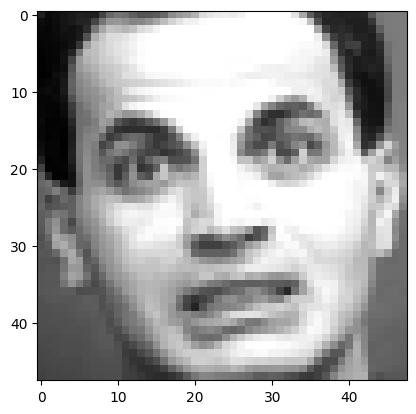

In [120]:
pplt.imshow(X_test[20],cmap ='gray')

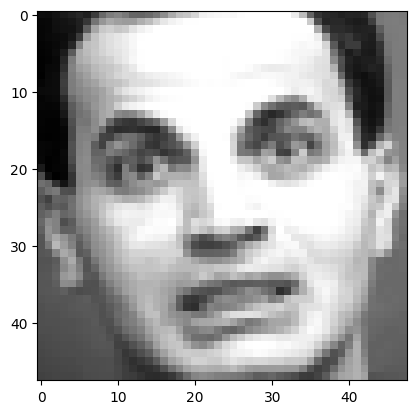

In [121]:
pplt.imshow(X_test[27],cmap ='gray')

In [124]:
model.save("my_model1.keras")

In [128]:
#jakbysmy chcieli wczytac model
reconstructed_model = keras.models.load_model("my_model1.keras")

In [131]:
#to samo jest
np.testing.assert_allclose(
    model.predict(X_test), reconstructed_model.predict(X_test)
)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


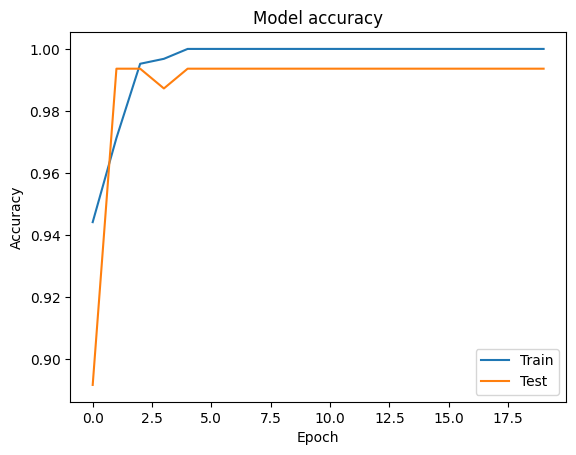

In [152]:
plt.figure()
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()
